## Downstream canyon run,  with conduino, probes ANK1 and ANK2, high N, 

Probe ANK1 upstream and ANK2 downstream, profiler probe P, no dye. 

* 800 g salt into bucket 1
* Table profile f0=0.70, dt1=16.8s, f1=0.75, dt2=50, f2=0.78 rad/s.
* Profiler now has a guiding tube (PVC) to prevent it from swinging during casts. You need to push the probe down a bit during downcasts to make sure probe and cable don't get stuck at tube.
* Conduino measurements approximately every 30 min.

Calibration for probes from 29 March 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P_probes_29mar19.ipynb)

#### Stratification

Bucket 1 , 800 g salt ρ1=1.02965 g cm−3, ρ2=0.99750 g cm−3

#### Tank filling

Started: 13:40 hrs, ended: 15:15 hrs.

#### Conduino measurements

|time| 	What for? |	file|
|::|::|::|
|15:19 	|check up before profile| 	checkup_15_19.mat|
|15:19 	|profile 	|profile_after_filling.mat|
|15:54 	|check up 	|checkup_15_54.mat|
|16:25 	|check up 	|checkup_16_25.mat|
|16:50 	|check up 	|checkup_16_50.mat|
|17:25 	|check up 	|checkup_17_25.mat|
|17:41 	|check up 	|checkup_17_41.mat|
|17:44 	|profile 	|initial_profile.mat|
|17:46 	|experiment |	experiment.mat|
|17:50(?)| 	profile |	final_profile.mat|

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel| 	Probe|
|::|::|
|'ch1':| 	ANK1|
|'ch2':| 	ANK2|
|'ch3':| 	P|


In [22]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [23]:
sns.set_style('whitegrid')

In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [25]:
def time2dist(max_depth, time):
    '''Convert time of measurement to distance - Not correct yet because 
    profiles goes faster at the top and slower at the bottom 
    so dt to dx conversion factor is not constant '''
    depth = np.zeros(np.shape(time))
    time_norm = time-time[0]
    depth = (time_norm * max_depth) / np.max(time_norm)
    return(depth)

def densP(reading):
    ''' Calibration from 29 feb 2019 in calibration_29mar19.ipynb. Returns density fitted using a 3rd deg polynomial.
    Input - reading::array
    Output - fitP::array of size [reading]'''
    fitP = 0.997378+(0.006040*reading)+(0.001648*reading**2)+(0.000105*reading**3)
    return(fitP)

def dens_ANK1(read):
    '''Calibration from 29 March 2019 in calibration_29mar19.ipynb'''
    rho_1 = 0.997387+0.004844*read+0.000312*read**2+0.000204*read**3 
    return(rho_1)

def dens_ANK2(read):
    '''Calibration  from 29 March 2019 in calibration_29mar19.ipynb '''
    rho_2 = 0.997311+0.006653*read+0.003429*read**2+-0.000041*read**3 # March 29, after knocking off
    #rho_2 = 0.982289+0.041039*read-0.010799*read**2+0.002785*read**3 # March 21st, Ashu's calibration, values are too high
    return(rho_2)

def plot_uprofile(ax):
    ax.axvline(16.8, color='0.8', linestyle=':')
    ax.axvline(50.0, color='0.8', linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P|



### Forcing

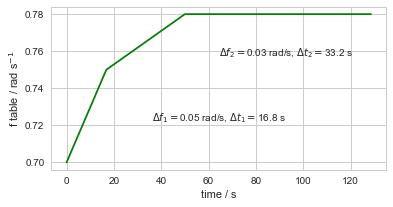

In [26]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.70 # initial f rad/s
f1 = 0.75 # rad/s
f2 = 0.78 # rad/s
t0 = 16.8 # s
t1 = 50.0 # s
exp_file = '../../exp_06apr19/experiment.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

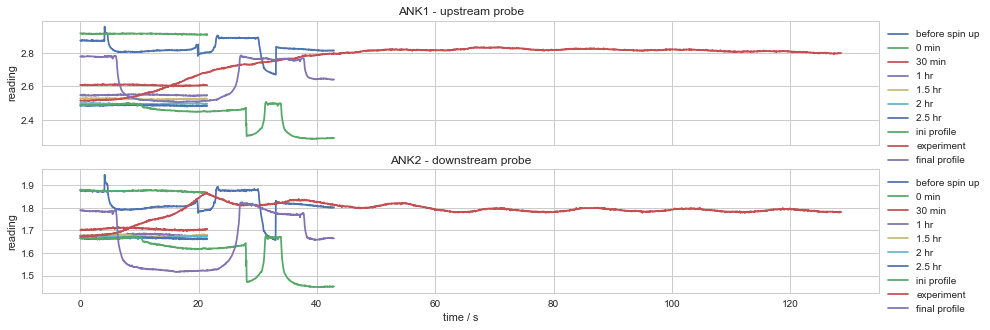

In [27]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr',
          '2 hr','2.5 hr','ini profile','experiment','final profile']

filepaths = ['../../exp_06apr19/profile_after_filling.mat',
             '../../exp_06apr19/checkup_15_19.mat',
             '../../exp_06apr19/checkup_15_54.mat',
             '../../exp_06apr19/checkup_16_25.mat',
             '../../exp_06apr19/checkup_16_50.mat',
             '../../exp_06apr19/checkup_17_25.mat',
             '../../exp_06apr19/checkup_17_41.mat',
             '../../exp_06apr19/initial_profile.mat',
             '../../exp_06apr19/experiment.mat',
             '../../exp_06apr19/final_profile.mat',
            ]
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

before spin up 1.0182050501642257 1.0205200449918608
0 min 1.0191916076141982 1.0215617476339338
30 min 1.0157602613773726 1.0184299572227746
1 hr 1.0151376612987548 1.0179401386030043
1.5 hr 1.0148964338739208 1.017901815938588
2 hr 1.014598390995449 1.0178108310758136
2.5 hr 1.0144952491125216 1.01770424939795
ini profile 1.0139071564070399 1.0165205412817364
experiment 1.0174827666997817 1.0199588776541415
final profile 1.0161352529186576 1.0175696361250626


Text(0.5,0,'time / s')

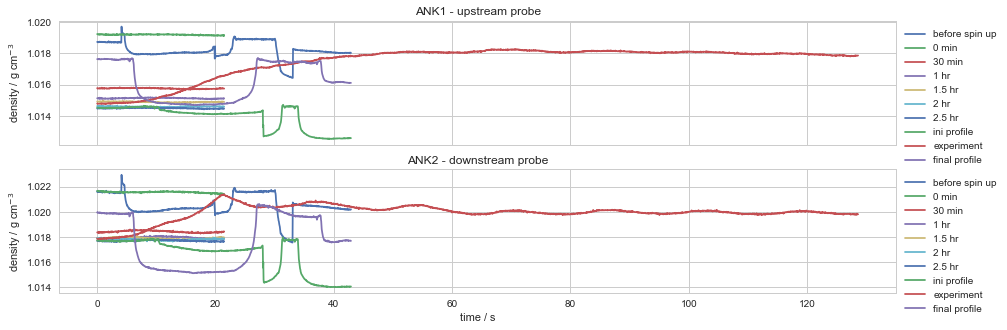

In [28]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(15,5), sharex=True)

labels = ['before spin up','0 min','30 min', '1 hr', '1.5 hr',
          '2 hr','2.5 hr','ini profile','experiment','final profile']

filepaths = ['../../exp_06apr19/profile_after_filling.mat',
             '../../exp_06apr19/checkup_15_19.mat',
             '../../exp_06apr19/checkup_15_54.mat',
             '../../exp_06apr19/checkup_16_25.mat',
             '../../exp_06apr19/checkup_16_50.mat',
             '../../exp_06apr19/checkup_17_25.mat',
             '../../exp_06apr19/checkup_17_41.mat',
             '../../exp_06apr19/initial_profile.mat',
             '../../exp_06apr19/experiment.mat',
             '../../exp_06apr19/final_profile.mat',
            ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']# dens_B(mat['ch1'])
    P2 = mat['ch2']#dens_C(mat['ch2'])
    time = mat['time']
    densP1 = dens_ANK1(P1)
    densP2 = dens_ANK2(P2)
    ax0.plot(time,densP1, label=lab)
    ax1.plot(time,densP2, label=lab)
    print(lab, np.mean(densP1), np.mean(densP2))
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

**Probe drift: Change in density throughout spin up**

Text(0.5,0,'time / s')

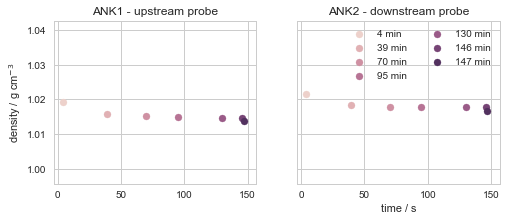

In [34]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(8,3), sharey=True)

time_checkup = [4,39,70,95,130,146, 147 ] # min
filepaths = ['../../exp_06apr19/checkup_15_19.mat',
             '../../exp_06apr19/checkup_15_54.mat',
             '../../exp_06apr19/checkup_16_25.mat',
             '../../exp_06apr19/checkup_16_50.mat',
             '../../exp_06apr19/checkup_17_25.mat',
             '../../exp_06apr19/checkup_17_41.mat',
             '../../exp_06apr19/initial_profile.mat', 
             ]
sns.set_palette(sns.cubehelix_palette(8))
for filepath, time_ch in zip(filepaths, time_checkup):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    densP1 = np.mean(dens_ANK1(P1))
    densP2 = np.mean(dens_ANK2(P2))
    ax0.scatter(time_ch,densP1, label='%s min' %time_ch)
    ax1.scatter(time_ch,densP2, label='%s min' %time_ch)
    
ax1.legend(loc=0, ncol=1)

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')

ax1.set_xlabel('time / s')

../../exp_06apr19/profile_after_filling.mat
../../exp_06apr19/initial_profile.mat
../../exp_06apr19/experiment.mat
../../exp_06apr19/final_profile.mat


Text(0.5,0,'time / s')

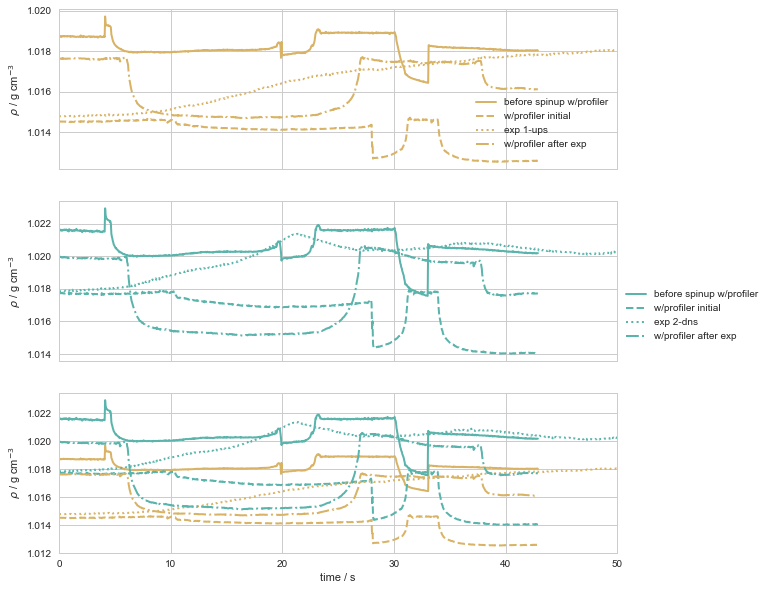

In [35]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,10), sharex=True)

labels1 = ['before spinup w/profiler', 'w/profiler initial','exp 1-ups','w/profiler after exp']
labels2 = ['before spinup w/profiler', 'w/profiler initial','exp 2-dns','w/profiler after exp']

colors = ['#d8b365','#5ab4ac']

filepaths = ['../../exp_06apr19/profile_after_filling.mat',
             '../../exp_06apr19/initial_profile.mat',
             '../../exp_06apr19/experiment.mat',
             '../../exp_06apr19/final_profile.mat']

lines = ['-','--',':','-.','-','--']
linewidths = [2,2,2,2,2,2]

for filepath, line, linew, lab1, lab2 in zip(filepaths, lines, linewidths, labels1, labels2):
    print(filepath)

    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1'] 
    P2 = mat['ch2'] 
    density_1 = dens_ANK1(P1)
    density_2 = dens_ANK2(P2)
    
    time = mat['time']
    ax0.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax1.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    ax2.plot(time,density_1,linestyle=line ,linewidth = linew, label=lab1, color=colors[0])
    ax2.plot(time,density_2,linestyle=line, linewidth=linew, label=lab2, color=colors[1])
    
ax0.legend(bbox_to_anchor=(1,0.5))
ax1.legend(bbox_to_anchor=(1,0.5))

ax0.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax1.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')

ax0.set_xlim(0,50)
ax1.set_xlim(0,50)
ax2.set_xlim(0,50)

ax2.set_xlabel('time / s')



### Profiles

Text(0,0.5,'$\\rho$ / g cm$^{-3}$')

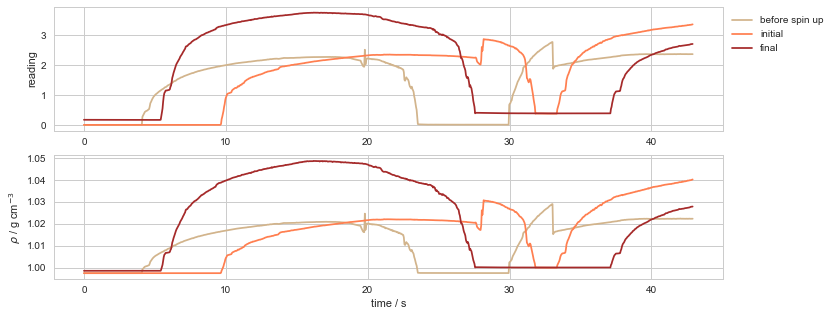

In [36]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))

colors = ['white','tan','coral','brown']

filepath_ini0 = '../../exp_06apr19/profile_after_filling.mat'
filepath_ini = '../../exp_06apr19/initial_profile.mat'
filepath_fin = '../../exp_06apr19/final_profile.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax1.plot(time_ini0,P_ini0, label='before spin up', color=colors[1])
ax1.plot(time_ini,P_ini, label='initial', color=colors[2])
ax1.plot(time_fin,P_fin, label='final', color=colors[3])
ax2.plot(time_ini0,dens_P_ini0, label='before spin up', color=colors[1])
ax2.plot(time_ini,dens_P_ini, label='initial', color=colors[2])
ax2.plot(time_fin,dens_P_fin, label='final', color=colors[3])

ax1.legend(bbox_to_anchor=(1,1))
ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')

(0, 10)

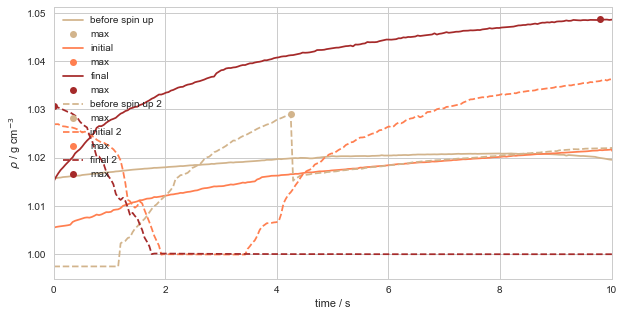

In [37]:
fig, (ax2) = plt.subplots(1,1, figsize=(10,5))
colors = ['white','tan','coral','brown']

filepath_ini0 = '../../exp_06apr19/profile_after_filling.mat'
filepath_ini = '../../exp_06apr19/initial_profile.mat'
filepath_fin = '../../exp_06apr19/final_profile.mat'

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

ax2.plot(time_ini0[212:560]-time_ini0[212],dens_P_ini0[212:560], label='before spin up', color=colors[1])
ind0 = np.argmax(dens_P_ini0[212:560])
ax2.plot(time_ini0[ind0],dens_P_ini0[212:560][ind0],'o', label='max', color=colors[1])

ax2.plot(time_ini[235:470]-time_ini[235],dens_P_ini[235:470], label='initial', color=colors[2])
ind1 = np.argmax(dens_P_ini[235:470])
ax2.plot(time_ini[ind1],dens_P_ini[235:470][ind1],'o', label='max', color=colors[2])

ax2.plot(time_fin[149:410]-time_fin[149],dens_P_fin[149:410], label='final', color=colors[3])
ind2 = np.argmax(dens_P_fin[149:410])
ax2.plot(time_fin[ind2],dens_P_fin[149:410][ind2],'o', label='max', color=colors[3])

ax2.plot(time_ini0[670:960]-time_ini0[670],dens_P_ini0[670:960],'--', label='before spin up 2', color=colors[1])
ind3 = np.argmax(dens_P_ini0[670:960])
ax2.plot(time_ini0[ind3],dens_P_ini0[670:960][ind3],'o', label='max', color=colors[1])

ax2.plot(time_ini[696:1060]-time_ini[696],dens_P_ini[696:1060],'--', label='initial 2', color=colors[2])
ind4 = np.argmax(dens_P_ini[696:1060])
ax2.plot(time_ini[ind4],dens_P_ini[696:1060][ind4],'o', label='max', color=colors[2])

ax2.plot(time_fin[601:900]-time_fin[601],dens_P_fin[601:900],'--', label='final 2', color=colors[3])
ind5 = np.argmax(dens_P_fin[601:900])
ax2.plot(time_fin[ind5],dens_P_fin[601:900][ind5],'o', label='max', color=colors[3])

ax2.legend(loc=0)
ax2.set_xlabel('time / s')
ax2.set_ylabel(r'$\rho$ / g cm$^{-3}$')
ax2.set_xlim(0,10)



IndexError: index 0 is out of bounds for axis 0 with size 0

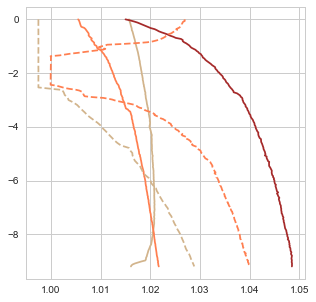

In [38]:
fig, (ax2) = plt.subplots(1,1, figsize=(5,5))

mat_ini0 = sio.loadmat(filepath_ini0, squeeze_me=True)
mat_ini = sio.loadmat(filepath_ini, squeeze_me=True)
mat_fin = sio.loadmat(filepath_fin, squeeze_me=True)

P_ini0 = mat_ini0['ch3']#dens_C(mat['ch2'])
P_ini = mat_ini['ch3']#dens_C(mat['ch2'])
P_fin = mat_fin['ch3']#dens_C(mat['ch2'])
dens_P_ini0 = densP(mat_ini0['ch3'])
dens_P_ini = densP(mat_ini['ch3'])
dens_P_fin = densP(mat_fin['ch3'])

time_ini0 = mat_ini0['time']
time_ini = mat_ini['time']
time_fin = mat_fin['time']

max_depth=9.2 # cm
ax2.plot(dens_P_ini0[212:212+ind0],-time2dist(max_depth,(time_ini0[212:212+ind0]-time_ini0[212])), label='before spin up', color=colors[1])

ax2.plot(dens_P_ini[235:235+ind1],-time2dist(max_depth,time_ini[235:235+ind1]-time_ini[135]), label='initial', color=colors[2])

ax2.plot(dens_P_fin[149:149+ind2], -time2dist(max_depth,time_fin[149:149+ind2]-time_fin[149]),label='final', color=colors[3])

ax2.plot(dens_P_ini0[670:670+ind3],-time2dist(max_depth,time_ini0[670:670+ind3]-time_ini0[670]),'--', label='before spin up 2', color=colors[1])
ax2.plot(dens_P_ini[696:696+ind4],-time2dist(max_depth,time_ini[696:696+ind4]-time_ini[696]),'--', label='initial 2', color=colors[2])
ax2.plot(dens_P_fin[601:601+ind5],-time2dist(max_depth,time_fin[601:601+ind5]-time_fin[601]),'--', label='final 2', color=colors[3])

ax2.axhline(-2,color='k', label='shelf break approx')
ax2.legend(bbox_to_anchor=(1,1))
ax2.set_ylabel('depth / cm')
ax2.set_xlabel(r'$\rho$ / g cm$^{-3}$')
ax2.grid(axis='both')

### Experiment

../../exp_06apr19/experiment.mat


Text(0.5,0,'sample')

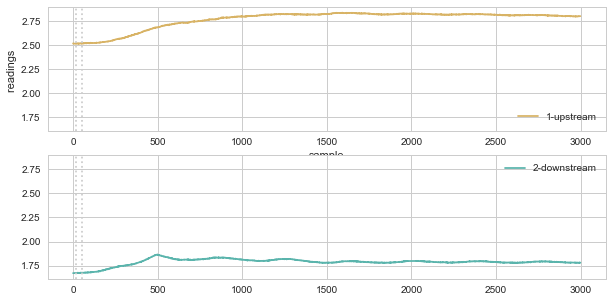

In [39]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = ['1-upstream','2-downstream']
colors = ['#d8b365','#5ab4ac']

filepath = '../../exp_06apr19/experiment.mat'
print(filepath)
    
mat = sio.loadmat(filepath, squeeze_me=True)
P1 = mat['ch1']
P2 = mat['ch2']
time = mat['time']
ax0.plot(P1,'-', label=labels[0], color=colors[0])
ax1.plot(P2,'-', label=labels[1], color=colors[1])
plot_uprofile(ax0)
plot_uprofile(ax1)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax0.set_xlabel('sample')

Text(0.5,1,'Probe density')

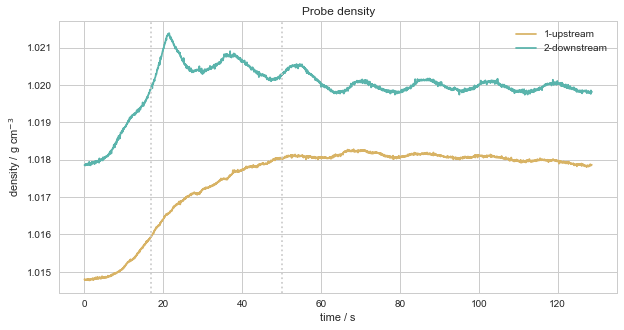

In [40]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1),'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2),'-', label=labels[1], color=colors[1])
plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


Text(0.5,1,'Probe density minus initial density')

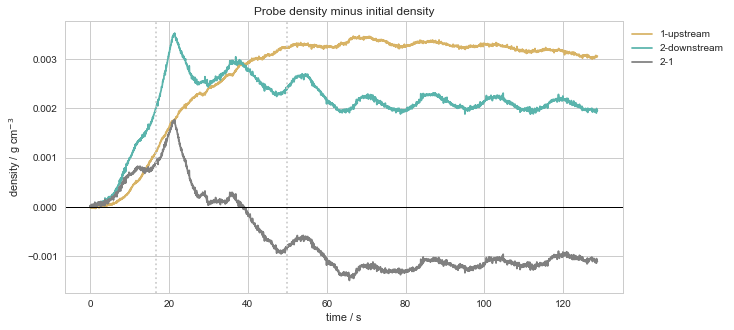

In [41]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label=labels[0], color=colors[0])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label=labels[1], color=colors[1])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1)-dens_ANK1(P1)[0]),'-', label='2-1', color='0.5')
plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


### Comparison between 1 and 2 canyon runs with high N

All high N runs: Upstream covered, downstream covered and two canyons

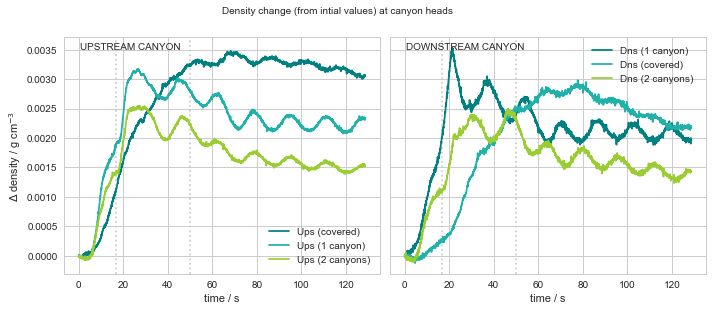

In [42]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)
labels = ['1-upstream','2-downstream']

filepath_two = '../../exp_26mar19/experiment.mat'
filepath_ups = '../../exp_04apr19/experiment.mat'

plot_uprofile(ax0)
plot_uprofile(ax1)

mat_two = sio.loadmat(filepath_two, squeeze_me=True)
P1_two = mat_two['ch1']
P2_two = mat_two['ch2']
time_two = mat_two['time']

mat_ups = sio.loadmat(filepath_ups, squeeze_me=True)
P1_ups = mat_ups['ch1']
P2_ups = mat_ups['ch2']
time_ups = mat_ups['time']

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='Ups (covered) ', color='teal')
ax0.plot(time_ups,dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0], label='Ups (1 canyon)', color='lightseagreen')
ax0.plot(time_two,dens_ANK1(P1_two)-dens_ANK1(P1_two)[0], label='Ups (2 canyons)', color='yellowgreen')

ax1.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='Dns (1 canyon)' , color='teal')
ax1.plot(time_two,dens_ANK2(P2_ups)-dens_ANK2(P2_ups)[0], label='Dns (covered) ', color='lightseagreen')
ax1.plot(time_two,dens_ANK2(P2_two)-dens_ANK2(P2_two)[0], label='Dns (2 canyons) ', color='yellowgreen')

ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.5,1.1,'Density change (from intial values) at canyon heads',transform=ax0.transAxes)
ax0.text(0.05,0.95,'UPSTREAM CANYON',transform=ax0.transAxes)
ax1.text(0.05,0.95,'DOWNSTREAM CANYON',transform=ax1.transAxes)

plt.tight_layout()

1 canyon runs, upstream vs. downstream canyons

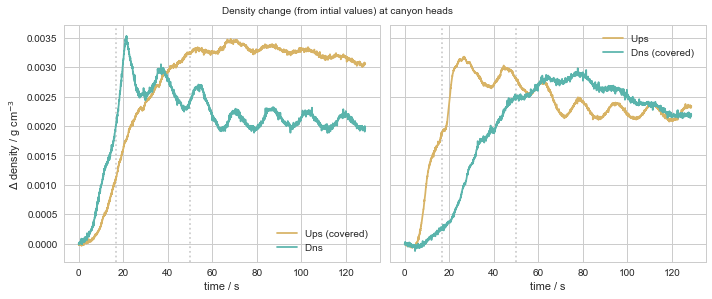

In [43]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharey=True)

plot_uprofile(ax0)
plot_uprofile(ax1)

ax0.plot(time,dens_ANK1(P1)-dens_ANK1(P1)[0],'-', label='Ups (covered) ', color=colors[0])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='Dns ' , color=colors[1])

ax1.plot(time_ups,dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0], label='Ups ', color=colors[0])
ax1.plot(time_ups,dens_ANK2(P2_ups)-dens_ANK2(P2_ups)[0],'-', label='Dns (covered) ' , color=colors[1])


ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.text(0.5,1.05,'Density change (from intial values) at canyon heads',transform=ax0.transAxes)
plt.tight_layout()

Difference between canyons when running 1-canyon expriments (error associated to probes, bathymetry irregularities, difference in depth, etc). Wavy thing has frecuency about 0.4 rad/s, table rotates at 0.7 rad/s.

Text(0.5,1,'Comparison 1-canyon runs')

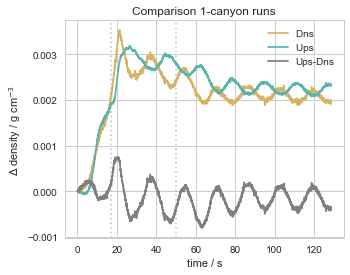

In [44]:
fig, (ax0) = plt.subplots(1,1, figsize=(5,4), sharey=True)

plot_uprofile(ax0)
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0],'-', label='Dns  ', color=colors[0])
ax0.plot(time,dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0],'-', label='Ups ' , color=colors[1])
ax0.plot(time,dens_ANK2(P2)-dens_ANK2(P2)[0]-(dens_ANK1(P1_ups)-dens_ANK1(P1_ups)[0]),'-', label='Ups-Dns', color='0.5')

ax0.legend(loc=0)
ax0.set_ylabel('$\Delta$ density / g cm$^{-3}$ ')
ax0.set_xlabel('time / s')
ax0.set_title('Comparison 1-canyon runs')